In [104]:
from datetime import datetime as dt
import matplotlib as plt
import numpy as np
import pyhelayers
import utils 

In [105]:
requirement = pyhelayers.HeConfigRequirement(
    security_level=128,
    # Set the largest number to 2^20.
    integer_part_precision=20,
    # Set the precision to 1/2^40.
    fractional_part_precision=40)

# Allow 2 levels of multiplications
requirement.multiplication_depth = 5

# Number of slots per ciphertext
requirement.num_slots = 16384

he_context = pyhelayers.DefaultContext()
he_context.init(requirement)

In [106]:
def mult_speed(Num_slots):
    requirement = pyhelayers.HeConfigRequirement(
        security_level=128,
        # Set the largest number to 2^20.
        integer_part_precision=20,
        # Set the precision to 1/2^40.
        fractional_part_precision = Num_slots*10)

    # Allow 2 levels of multiplications
    requirement.multiplication_depth = 4

    # Number of slots per ciphertext
    requirement.num_slots = 2**(10 + Num_slots)

    he_context = pyhelayers.DefaultContext()
    he_context.init(requirement)

    encoder = pyhelayers.Encoder(he_context)
    
    speed_test = []
    er = []
    for i in range(4):
        N = 10**i
        error = []
        for j in range(3):
            encrypt_time = []
            decrypt_time = []
            c_mult_time = []
            M1 = np.random.normal(size = N)
            M2 = np.random.normal(size = N)
            
            st = dt.now()
            C1 = encoder.encode_encrypt(M1)
            C2 = encoder.encode_encrypt(M2)
            encrypt_time.append((dt.now()-st).total_seconds())

            st = dt.now()            
            C1.multiply(C2)
            c_mult_time.append((dt.now()-st).total_seconds())

            st = dt.now()            
            D1 = np.array(encoder.decrypt_decode_double(C1))
            decrypt_time.append((dt.now()-st).total_seconds())

            error.append(np.sum(M1*M2 - D1[:N])/N)
        
        speed_test.append([np.mean(encrypt_time), np.mean(decrypt_time), np.mean(c_mult_time)]) 
        print(np.mean(error))
        er.append(np.mean(error))
    print(speed_test)
    return speed_test

# В ходе экспериментов выявлено, что временная сложность шифрования, дешифорваний и операций линейно зависит от *Number of slots per ciphertext*

0.0006753635202988734
-0.0002826407605076486
0.0002552886252652185
8.642225401918067e-06
[[0.009176, 0.001099, 0.005165], [0.008548, 0.001087, 0.005247], [0.008427, 0.001144, 0.005109], [0.00899, 0.001138, 0.005064]]
-2.7137678132449494e-08
6.370227927885124e-07
-1.7397057620063808e-07
4.2833121170708975e-08
[[0.018611, 0.002384, 0.011323], [0.018781, 0.002814, 0.011536], [0.018345, 0.002463, 0.012119], [0.021132, 0.002601, 0.01208]]
-1.0566995028993276e-08
1.8717957860764354e-10
-1.0760169926403967e-10
6.242556808701516e-11
[[0.036691, 0.00478, 0.023145], [0.038424, 0.004715, 0.023901], [0.037426, 0.004906, 0.022486], [0.037807, 0.005021, 0.022499]]


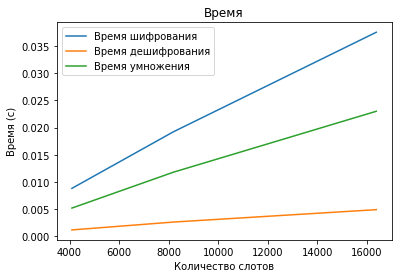

In [119]:
import numpy as np
import matplotlib.pyplot as plt

#  Данные:
x = [i for i in range(2,5)]
m_s = [np.array(mult_speed(i)).mean(axis=0) for i in x] 
y1 = np.array(m_s)[:,0]
y2 = np.array(m_s)[:,1]
y3 = np.array(m_s)[:,2]
# img = y.reshape(5, 20)

#  Создаем "Figure" и "Axes":
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

li = [2**(10+i) for i in x]
#  Методы, отображающие данные:
ax.plot(li, y1, label = 'Время шифрования')
ax.plot(li, y2,  label = 'Время дешифрования')
ax.plot(li, y3, label = 'Время умножения')

#  Добавление заголовков:
ax.legend(loc = 'upper left') 
ax.set(title = 'Время')

ax.set_xlabel('Количество слотов')
ax.set_ylabel('Время (с)')
# plt.show()
plt.savefig('time.png')